# Seaborn crash course
<img src='https://seaborn.pydata.org/_images/hexbin_marginals.png' height="150" width="150">
Seaborn is an amazing data and statistical visualization library that is built using matplotlib. It has good defaults and very easy to use.

**ToC**
 - [load sample dataset](#Load-sample-dataset)
 - [Distribution plots](#Distribution-plots)
   - [Plotting dist of 2 variables](#Plotting-dist-of-2-variables)
     - [annotating with correlation coefficient if unavailable](#Annotating-correlation-coefficient-and-p-value-if-unavailable)
   - [Plotting dist of all variables](#Plotting-dist-of-all-variables)
 - [Plotting data frequency](#Plotting-data-frequency)

In [1]:
import seaborn as sns
%matplotlib inline

## Load sample dataset
Seaborn comes with a number of example dataset. Let us load the restaurant tipping dataset

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution plots
One of the first things we do is to find the data dist.

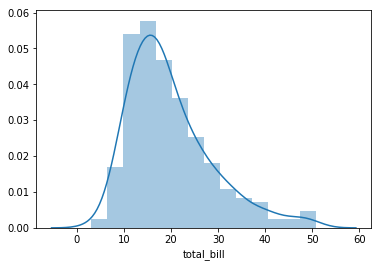

In [6]:
#find dist of total bills
sns.distplot(tips['total_bill'])

It is often useful to overlay the mean and SD with the histograms, below is one way to do it.

In [13]:
tips.total_bill.mean()

19.78594262295082

Text(0.5,1,'$\\mu = 19.79$ | $\\sigma = 8.9$')

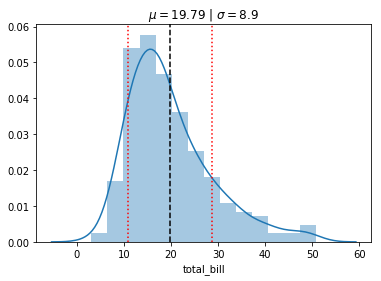

In [20]:
tips_mean = tips.total_bill.mean()
tips_sd = tips.total_bill.std()

ax = sns.distplot(tips['total_bill'])

# plot mean in black
ax.axvline(x=tips_mean, color='black', linestyle='dashed')

# plot mean +- 1SD in red, dotted
ax.axvline(x=tips_mean + tips_sd, color='red', linestyle='dotted')
ax.axvline(x=tips_mean - tips_sd, color='red', linestyle='dotted')

# title
ax.set_title('$\mu = {}$ | $\sigma = {}$'.format(round(tips_mean, 2), round(tips_sd, 2)))

You can change things like `bin`, `kde` flags to customize the plot

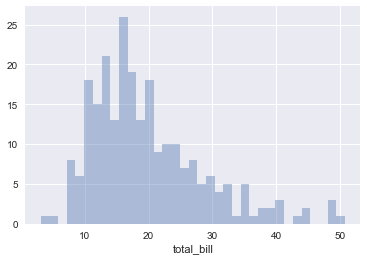

In [5]:
sns.distplot(tips['total_bill'], kde=False, bins=35)

### Plotting dist of 2 variables
Seaborn can very easily attach a histogram to a scatter plot to show the data distribution

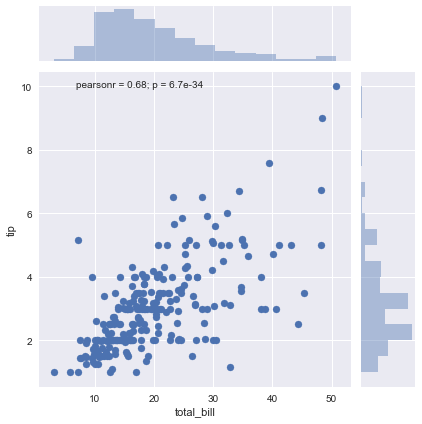

In [6]:
sns.jointplot(x=tips['total_bill'], y=tips['tip'])

You can use the `kind` argument to change the `scatter` to `hex`, `reg` etc

#### Annotating correlation coefficient and p value if unavailable
<blockquote>
    <b>Note:</b> In recent versions, seaborn does not print the correlation coefficient and its p-value. To get this, use annotation as shown below:
</blockquote>

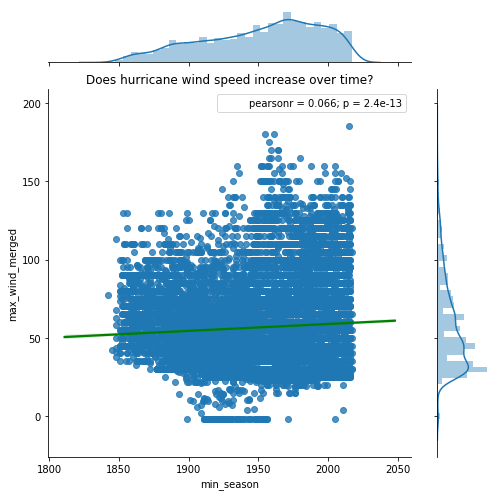

In [102]:
jgrid = sns.jointplot(x='min_season', y='max_wind_merged', data=hurricanes_ipl,
             kind='reg', joint_kws={'line_kws':{'color':'green'}}, height=7, space=0.5)
j = jgrid.annotate(stats.pearsonr)
j = jgrid.ax_joint.set_title('Does hurricane wind speed increase over time?')

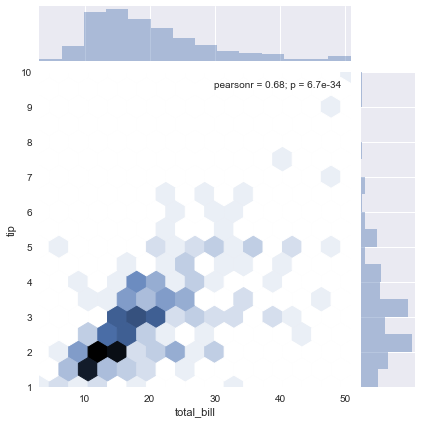

In [7]:
sns.jointplot(x=tips['total_bill'], y=tips['tip'], kind='hex')

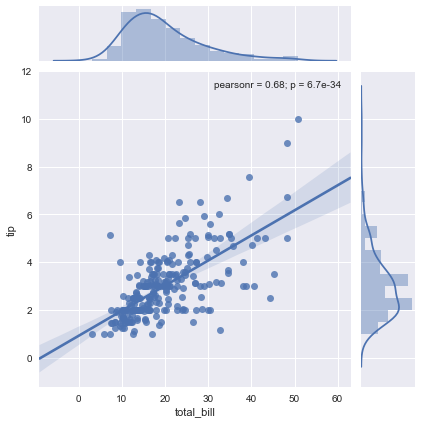

In [8]:
sns.jointplot(x=tips['total_bill'], y=tips['tip'], kind='reg') #regression

### Plotting dist of all variables
You can get a quick overview of the pariwise relationships between your columns using `pairplot`. Specifying a categorical variable to `hue` argument will shade it accordingly

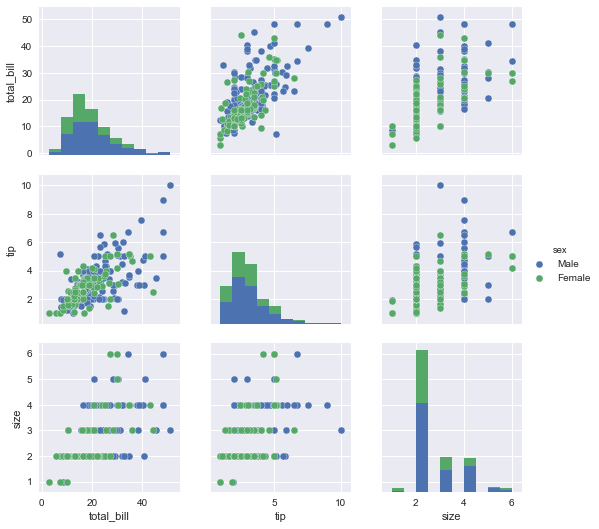

In [10]:
sns.pairplot(tips, hue='sex')

## Plotting data frequency
Histograms provide data frequency. The `distplot` gives histograms. Another way to viz this is using `rugplot`. Rug plots are similar to the trading frequency bars we see in stock ticker time series datasets.

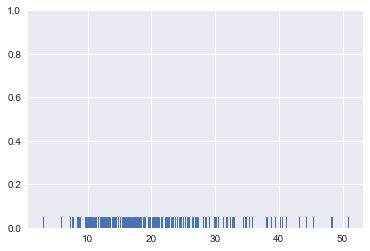

In [11]:
sns.rugplot(tips['total_bill'])